# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 595


'grytviken'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# cities = ["Paris", "London", "Oslo", "Beijing"]
# Loop through all the cities in our list to fetch weather data
for city in cities:
       
    # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wynyard
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | ayod
City not found. Skipping...
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | haiku-pauwela
Processing Record 7 of Set 1 | harper
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | bamboo flat
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | wareham
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | aberdeen
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of 

Processing Record 187 of Set 1 | zakynthos
Processing Record 188 of Set 1 | alice springs
Processing Record 189 of Set 1 | invercargill
Processing Record 190 of Set 1 | cedeira
Processing Record 191 of Set 1 | kedougou
Processing Record 192 of Set 1 | shingu
Processing Record 193 of Set 1 | ungsang-nodongjagu
Processing Record 194 of Set 1 | jawf al maqbabah
Processing Record 195 of Set 1 | uturoa
Processing Record 196 of Set 1 | holualoa
Processing Record 197 of Set 1 | college
Processing Record 198 of Set 1 | gizo
Processing Record 199 of Set 1 | coruripe
Processing Record 200 of Set 1 | manokwari
Processing Record 201 of Set 1 | lovington
Processing Record 202 of Set 1 | buenaventura
Processing Record 203 of Set 1 | sanya
Processing Record 204 of Set 1 | rocky mountain house
Processing Record 205 of Set 1 | espargos
City not found. Skipping...
Processing Record 206 of Set 1 | ritchie
Processing Record 207 of Set 1 | cannonvale
Processing Record 208 of Set 1 | carnarvon
Processing Re

Processing Record 373 of Set 1 | miri
Processing Record 374 of Set 1 | saraktash
Processing Record 375 of Set 1 | ayabaca
Processing Record 376 of Set 1 | nyurba
Processing Record 377 of Set 1 | belyy yar
Processing Record 378 of Set 1 | alagoinha
Processing Record 379 of Set 1 | yaren
Processing Record 380 of Set 1 | whangarei
Processing Record 381 of Set 1 | wanning
Processing Record 382 of Set 1 | crane
Processing Record 383 of Set 1 | tanrake village
City not found. Skipping...
Processing Record 384 of Set 1 | kamloops
Processing Record 385 of Set 1 | baley
Processing Record 386 of Set 1 | luderitz
Processing Record 387 of Set 1 | vila velha
Processing Record 388 of Set 1 | mollendo
Processing Record 389 of Set 1 | tindouf
Processing Record 390 of Set 1 | oppdal
Processing Record 391 of Set 1 | kununurra
Processing Record 392 of Set 1 | sao raimundo nonato
Processing Record 393 of Set 1 | tregunc
Processing Record 394 of Set 1 | taroa
Processing Record 395 of Set 1 | cestos city
Pr

Processing Record 560 of Set 1 | guerrero negro
Processing Record 561 of Set 1 | moroto
Processing Record 562 of Set 1 | oranjemund
Processing Record 563 of Set 1 | vila franca do campo
Processing Record 564 of Set 1 | dayr al 'asafir
City not found. Skipping...
Processing Record 565 of Set 1 | trebon
Processing Record 566 of Set 1 | grenada
Processing Record 567 of Set 1 | ariquemes
Processing Record 568 of Set 1 | yamethin
Processing Record 569 of Set 1 | murashi
Processing Record 570 of Set 1 | mindelo
Processing Record 571 of Set 1 | carupano
Processing Record 572 of Set 1 | pontalina
Processing Record 573 of Set 1 | katol
Processing Record 574 of Set 1 | verkhniy baskunchak
Processing Record 575 of Set 1 | kikwit
Processing Record 576 of Set 1 | dawson creek
Processing Record 577 of Set 1 | cill airne
Processing Record 578 of Set 1 | soc trang
Processing Record 579 of Set 1 | lahad datu
Processing Record 580 of Set 1 | itoman
Processing Record 581 of Set 1 | kangding
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lon           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wynyard,-41.0000,145.7167,6.66,82,52,6.51,AU,1694124482
1,grytviken,-54.2811,-36.5092,-2.89,81,52,6.67,GS,1694124482
2,papatowai,-46.5619,169.4708,13.24,59,52,1.90,NZ,1694124482
3,port-aux-francais,-49.3500,70.2167,3.05,81,100,18.84,TF,1694124483
4,haiku-pauwela,20.9219,-156.3051,28.01,66,20,9.26,US,1694124483


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wynyard,-41.0000,145.7167,6.66,82,52,6.51,AU,1694124482
1,grytviken,-54.2811,-36.5092,-2.89,81,52,6.67,GS,1694124482
2,papatowai,-46.5619,169.4708,13.24,59,52,1.90,NZ,1694124482
3,port-aux-francais,-49.3500,70.2167,3.05,81,100,18.84,TF,1694124483
4,haiku-pauwela,20.9219,-156.3051,28.01,66,20,9.26,US,1694124483


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

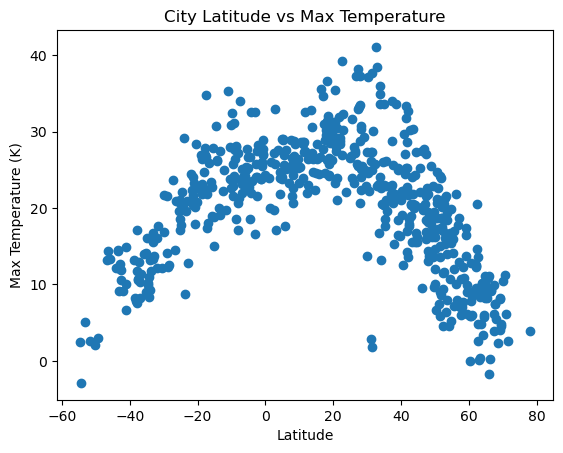

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

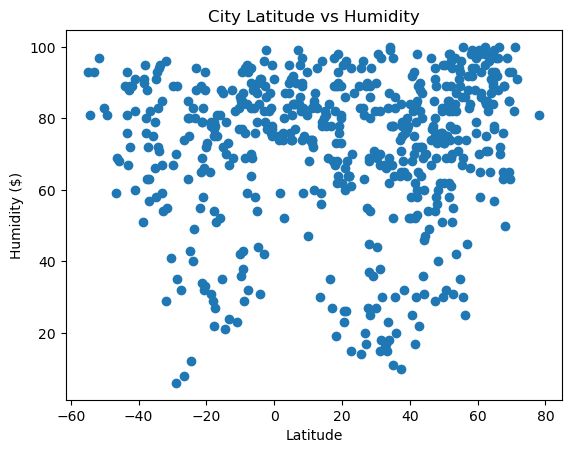

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity ($)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

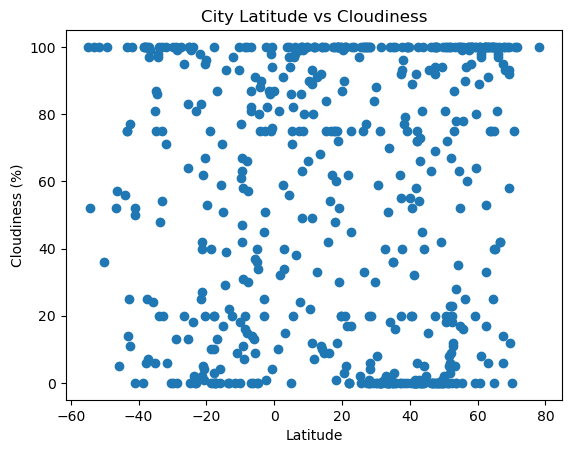

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
# Incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

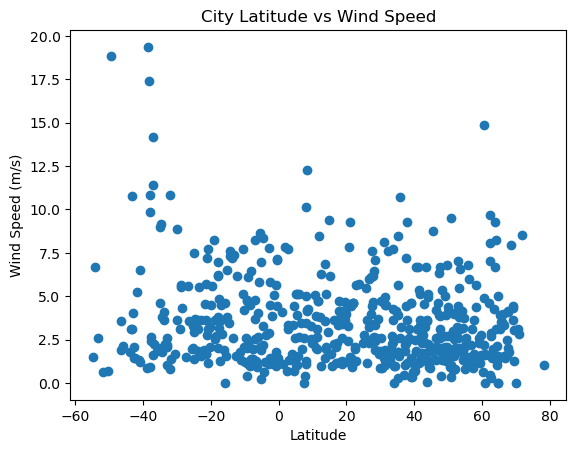

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x,y,df):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[f'{x}'], df[f'{y}'])
    regress_values = df[f'{x}'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(df[f'{x}'],df[f'{y}'])
    plt.plot(df[f'{x}'],regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    print(f"The correlation is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,haiku-pauwela,20.9219,-156.3051,28.01,66,20,9.26,US,1694124483
5,harper,4.3750,-7.7169,24.70,90,56,3.32,LR,1694124484
6,yellowknife,62.4560,-114.3525,14.67,71,17,8.05,CA,1694124484
7,lompoc,34.6391,-120.4579,25.99,67,0,4.12,US,1694124484
8,bamboo flat,11.7000,92.7167,27.41,85,100,4.72,IN,1694124484


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wynyard,-41.0000,145.7167,6.66,82,52,6.51,AU,1694124482
1,grytviken,-54.2811,-36.5092,-2.89,81,52,6.67,GS,1694124482
2,papatowai,-46.5619,169.4708,13.24,59,52,1.90,NZ,1694124482
3,port-aux-francais,-49.3500,70.2167,3.05,81,100,18.84,TF,1694124483
10,waitangi,-43.9535,-176.5597,12.12,89,56,1.79,NZ,1694124485


###  Temperature vs. Latitude Linear Regression Plot

The correlation is: -0.735740169986816


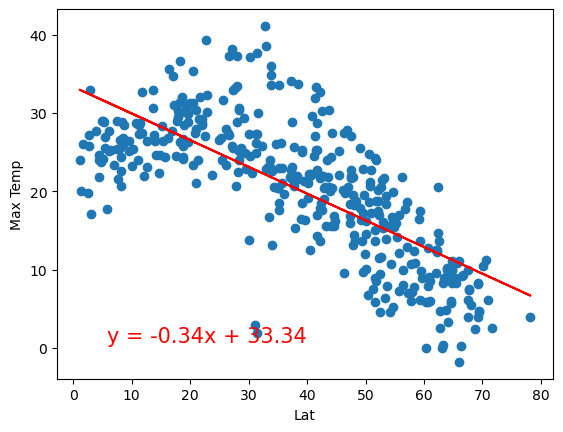

In [15]:
# Linear regression on Northern Hemisphere
lin_reg('Lat','Max Temp',northern_hemi_df)

The correlation is: 0.8238216544107296


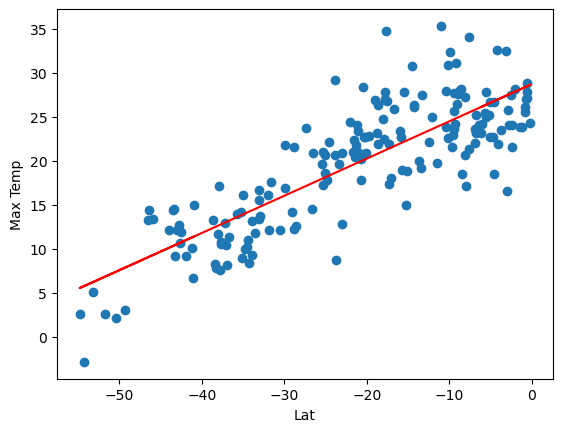

In [16]:
# Linear regression on Southern Hemisphere
lin_reg('Lat','Max Temp',southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The correlation is: 0.10569651678504681


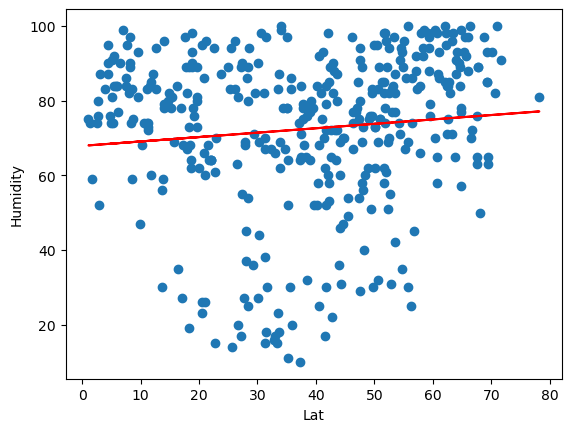

In [17]:
# Northern Hemisphere
lin_reg('Lat','Humidity',northern_hemi_df)

The correlation is: -0.03894845597329149


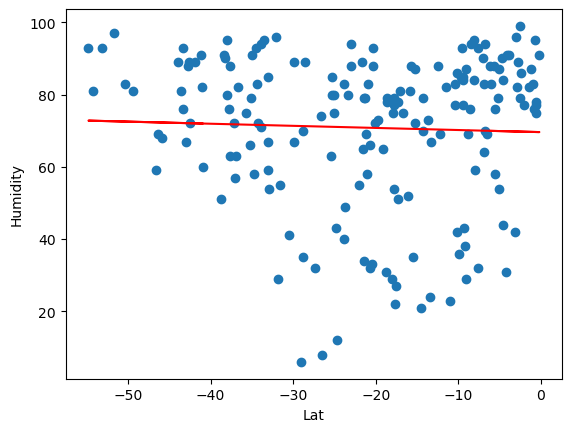

In [18]:
# Southern Hemisphere
lin_reg('Lat','Humidity',southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation is: -0.004569942563851794


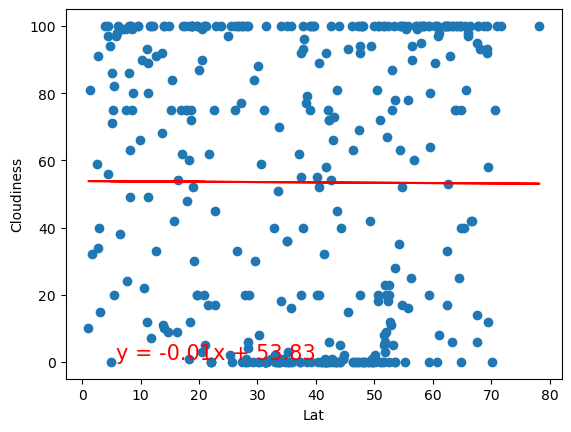

In [19]:
# Northern Hemisphere
lin_reg('Lat','Cloudiness',northern_hemi_df)

The correlation is: -0.1260692217421474


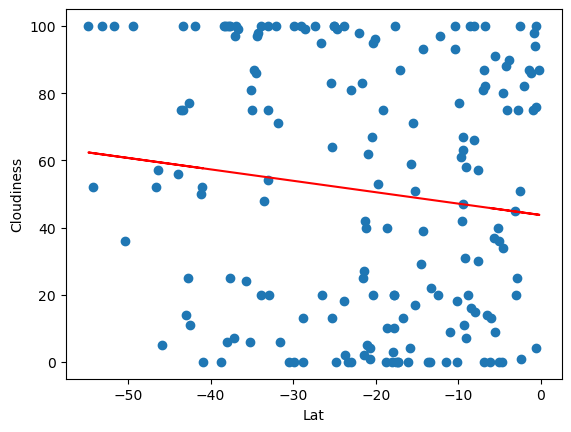

In [20]:
# Southern Hemisphere
lin_reg('Lat','Cloudiness',southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation is: -0.07507981384314777


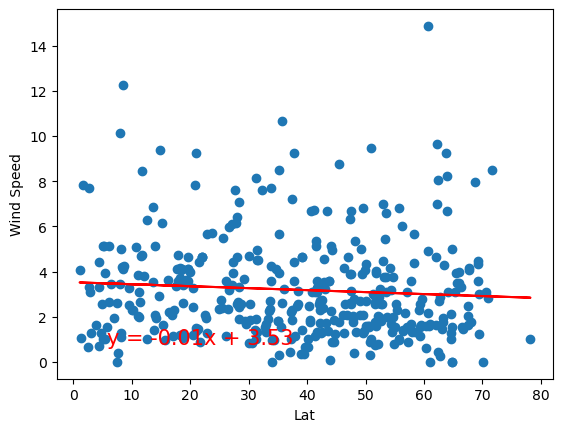

In [21]:
# Northern Hemisphere
lin_reg('Lat','Wind Speed',northern_hemi_df)

The correlation is: -0.13571503409843133


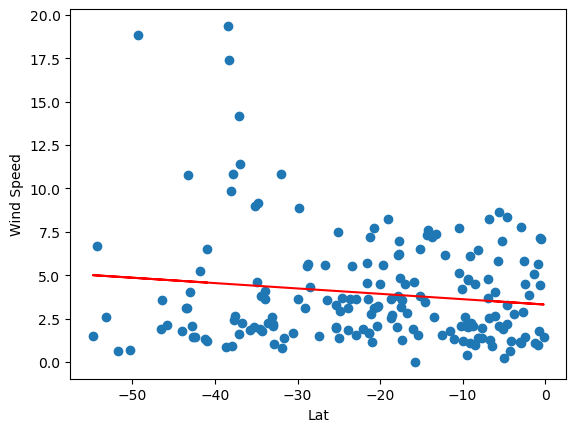

In [22]:
# Southern Hemisphere
lin_reg('Lat','Wind Speed',southern_hemi_df)

**Discussion about the linear relationship:** Max temperature increases as you get closer to the equator. Humidity, cloudiness, and wind speeds tend to decrease as you get closer to the equator.